In [1]:
from gio_model import GioModel
from math import sqrt
from time import sleep, time

import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

Turn off auto scrolling

In [2]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
        });

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import tensorflow as tf

tf.InteractiveSession()

ROOT_DIR = '/Users/abel/data'

def get_model(game_id):
    return GioModel.fromFile(ROOT_DIR + '/gio/models/%s.giomodel.gz' % (game_id))

models = os.listdir(ROOT_DIR + '/gio/models')
game_ids = map(lambda x: x[:x.find('.')], models)

In [4]:
model = get_model(game_ids[10])

print 'http://generals.io/replays/' + model.id

print model.ranks

http://generals.io/replays/B5-EAph8l
[7, 5, 3, 4, 0, 2, 6, 1]


In [5]:
model = get_model(game_ids[10])

print model.board_[0, 4, 1]
print model.isVisible(881, 4, 1, 7)

[ 1.  5.  4.]
True


In [6]:
owner_ch = model.board_[:, :, :, 1]
owner_ch[owner_ch == 1] = -2
owner_ch[owner_ch == 0] = 1
owner_ch[owner_ch == -2] = 0

Visualize channels for a random game:

http://generals.io/replays/BKS4wOPIe
[1, 0]


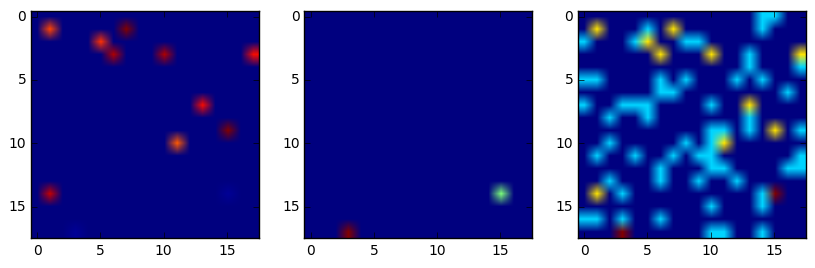

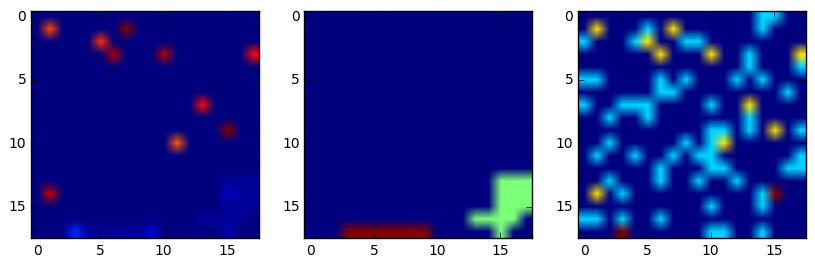

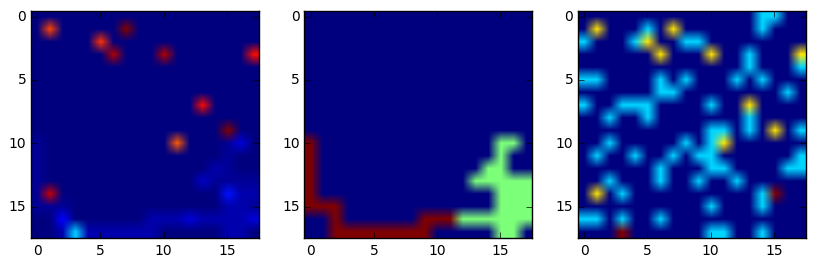

In [7]:
model = get_model(np.random.choice(game_ids, 1)[0])

def visualize_game(model, res=32, view=None):
    print 'http://generals.io/replays/' + model.id
    print model.ranks
    board = model.getBoardView(view) if view is not None else model.board_

    for i in range(board.shape[0] / res):
        turn = i * res
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        for i in range(3):
            axs[i].imshow(board[turn][:, :, i])

visualize_game(model)

Visualize game from player-index 0's perspective:

http://generals.io/replays/BKS4wOPIe
[1, 0]


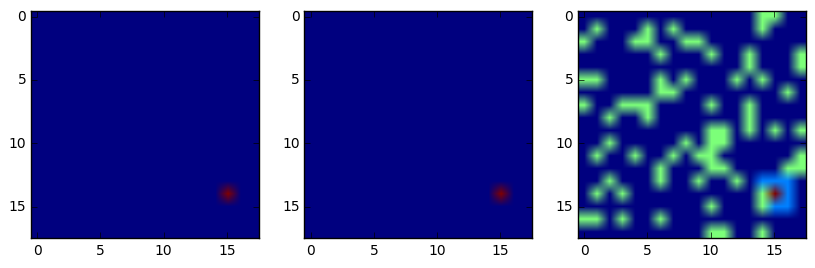

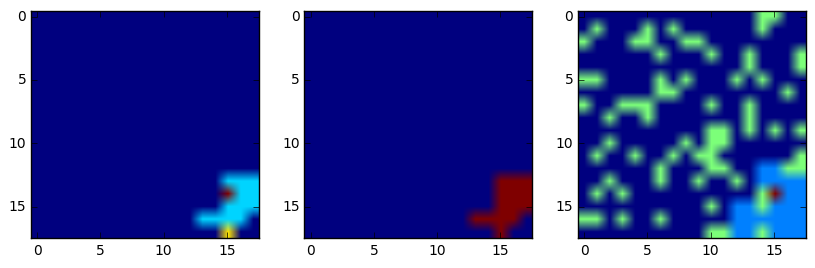

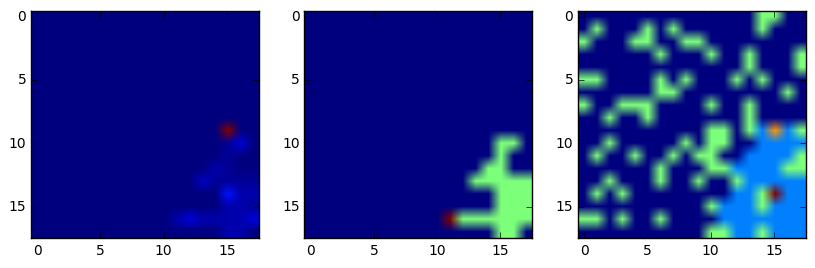

In [8]:
visualize_game(model, view=0)

In [9]:
scoreboard = model.getScoreBoard()
army_count = np.zeros((model.num_turns, 8))
army_count[:, :model.num_players] = scoreboard['army']

In [10]:
ex = tf.train.SequenceExample(
    context=tf.train.Features(feature={
        'a': tf.train.Feature(float_list=tf.train.FloatList(value=[0.5]))
    }),
    feature_lists=tf.train.FeatureLists(feature_list={
        'b': tf.train.FeatureList(feature=[
                tf.train.Feature(float_list=tf.train.FloatList(value=[1, 2])),
                tf.train.Feature(float_list=tf.train.FloatList(value=[3, 4]))])
    }))
print ex

context {
  feature {
    key: "a"
    value {
      float_list {
        value: 0.5
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "b"
    value {
      feature {
        float_list {
          value: 1
          value: 2
        }
      }
      feature {
        float_list {
          value: 3
          value: 4
        }
      }
    }
  }
}



In [11]:
context_features = { 'a': tf.FixedLenFeature([], dtype=tf.float32) }
sequence_features = { 'b': tf.FixedLenSequenceFeature([2], dtype=tf.float32) }
context, sequence = tf.parse_single_sequence_example(
  ex.SerializeToString(),
  context_features,
  sequence_features)

In [12]:
b_seq = sequence['b'].get_shape()

In [13]:
a = np.random.random((3, 2, 2, 2))
print a

[[[[ 0.46219924  0.68259125]
   [ 0.21612638  0.13762478]]

  [[ 0.90134832  0.74566757]
   [ 0.76895854  0.37305832]]]


 [[[ 0.13824232  0.68138828]
   [ 0.75744676  0.86974751]]

  [[ 0.90775784  0.09117975]
   [ 0.03504679  0.75985343]]]


 [[[ 0.67949611  0.18229991]
   [ 0.38135159  0.50742113]]

  [[ 0.29463975  0.90562623]
   [ 0.6766429   0.33940914]]]]


In [14]:
tf.contrib.layers

<module 'tensorflow.contrib.layers' from '/usr/local/lib/python2.7/site-packages/tensorflow/contrib/layers/__init__.pyc'>

In [15]:
b = np.zeros((3, 3, 3, 2))
b[:a.shape[0], :a.shape[1], :a.shape[2], :a.shape[3]] = a

In [16]:
TFRecordOptions = tf.python_io.TFRecordOptions
TFRecordCompressionType = tf.python_io.TFRecordCompressionType

record_iterator = tf.python_io.tf_record_iterator("/Users/abel/data/gio/examples/validation.tfrecords", options=TFRecordOptions(TFRecordCompressionType.GZIP));

In [17]:
record = record_iterator.next()

In [18]:
ex = tf.train.SequenceExample()
ex.ParseFromString(record)

In [19]:
ex.context

feature {
  key: "height"
  value {
    int64_list {
      value: 23
    }
  }
}
feature {
  key: "label"
  value {
    int64_list {
      value: 7
    }
  }
}
feature {
  key: "num_players"
  value {
    int64_list {
      value: 8
    }
  }
}
feature {
  key: "num_turns"
  value {
    int64_list {
      value: 216
    }
  }
}
feature {
  key: "width"
  value {
    int64_list {
      value: 23
    }
  }
}

In [ ]:
a = np.random.random((3))
b = np.random.random((3))
print a
print b

In [ ]:
tf.stack([tf.constant(a), tf.constant(b)], 1).eval()